In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\ASUS\\Desktop\\house_rental_data (2).csv")
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [2]:
print("No. Columns and Rows\n", '-'*30, sep='')
df.shape

No. Columns and Rows
------------------------------


(645, 8)

In [3]:
print("Data Info\n", '-'*50, sep='')
df.info()

Data Info
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [4]:
print("Description of DataSet\n", '-'*100, sep='')
df.describe()

Description of DataSet
----------------------------------------------------------------------------------------------------


,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [5]:
print("Finding Null Values\n", '-'*50, sep='')
df.isnull().sum()

Finding Null Values
--------------------------------------------------


Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [6]:
df.drop(['Floor', 'TotalFloor', 'Living.Room', 'Bathroom'], axis=1, inplace=True)

In [7]:
df

,Unnamed: 0,Sqft,Bedroom,Price
0,1,1177.698,2,62000
1,2,2134.800,4,78000
2,3,1138.560,2,58000
3,4,1458.780,3,45000
4,5,967.776,3,45000
...,...,...,...,...
640,644,1359.156,3,45000
641,645,377.148,1,24800
642,646,740.064,1,45000
643,647,1707.840,3,65000


In [8]:
df.rename(columns= {'Unnamed: 0' : "Index"}, inplace= True)

In [9]:
df

,Index,Sqft,Bedroom,Price
0,1,1177.698,2,62000
1,2,2134.800,4,78000
2,3,1138.560,2,58000
3,4,1458.780,3,45000
4,5,967.776,3,45000
...,...,...,...,...
640,644,1359.156,3,45000
641,645,377.148,1,24800
642,646,740.064,1,45000
643,647,1707.840,3,65000


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\User

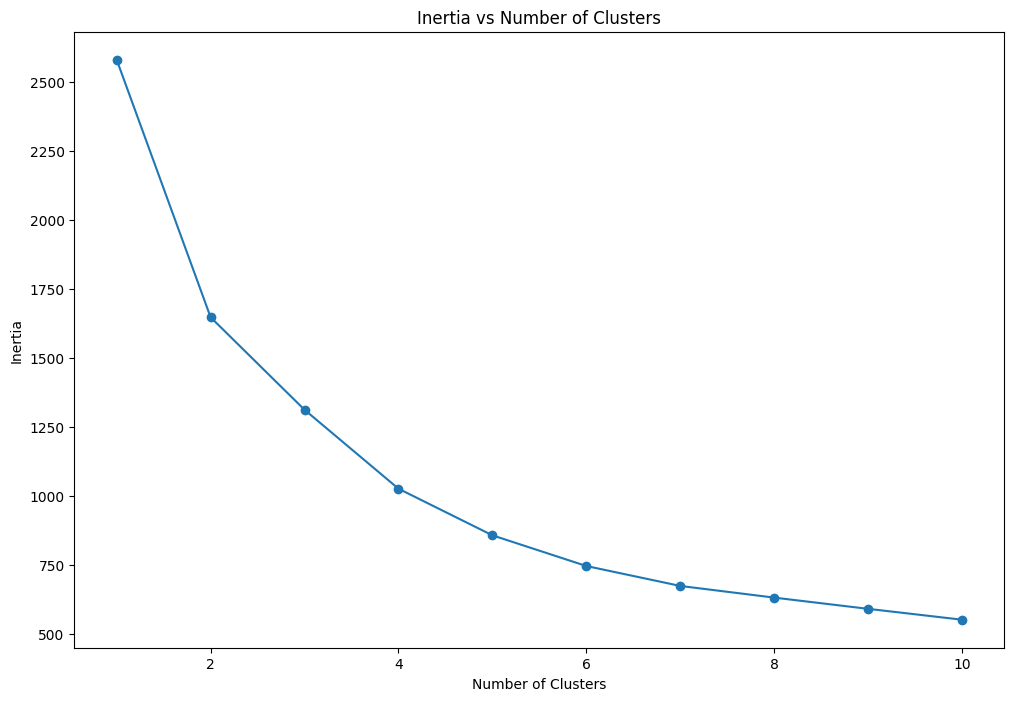

In [11]:
# Finding the optimal value of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

In [12]:
# Train the model with the best value of k
# based on the elbow of plot
k = 4  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Storing cluster to which the house belongs along with the data
df['Cluster'] = kmeans.labels_
print(df.head())

   Index      Sqft  Bedroom  Price  Cluster
0      1  1177.698        2  62000        2
1      2  2134.800        4  78000        2
2      3  1138.560        2  58000        2
3      4  1458.780        3  45000        2
4      5   967.776        3  45000        2


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
